In [35]:
import pandas as pd

# Tentando carregar o dataset novamente, desta vez especificando o delimitador correto
# Normalmente, os datasets CSV são separados por vírgulas
housing_data = pd.read_csv('housing.csv', delim_whitespace=True, header=None)

# Colunas do dataset Boston Housing conforme conhecido
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data.columns = column_names

# Visualizar novamente as primeiras linhas e as informações do dataset
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [37]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Agora o dataset "Boston Housing" foi carregado corretamente e suas colunas são:

CRIM: Taxa de criminalidade per capita por cidade.
ZN: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 sq.ft.
INDUS: Proporção de acres não comerciais por cidade.
CHAS: Variável fictícia Charles River (1 se trato limita o rio; 0 caso contrário).
NOX: Concentração de óxidos nítricos (partes por 10 milhões).
RM: Número médio de quartos por habitação.
AGE: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
DIS: Distâncias ponderadas para cinco centros de emprego em Boston.
RAD: Índice de acessibilidade às rodovias radiais.
TAX: Taxa de imposto sobre a propriedade de valor total por $10.000.
PTRATIO: Proporção aluno-professor por cidade.
B: 1000(Bk - 0.63)², onde Bk é a proporção de pessoas de descendência afro-americana por cidade.
LSTAT: Percentual de população de menor status.
MEDV: Valor mediano das casas ocupadas pelos proprietários em $1000s.
Agora, vamos proceder com a divisão dos dados em subconjuntos de treino e teste conforme a proporção de 70% treino e 30% teste. Em seguida, analisaremos graficamente a distribuição da variável "Número médio de quartos por habitação (RM)".

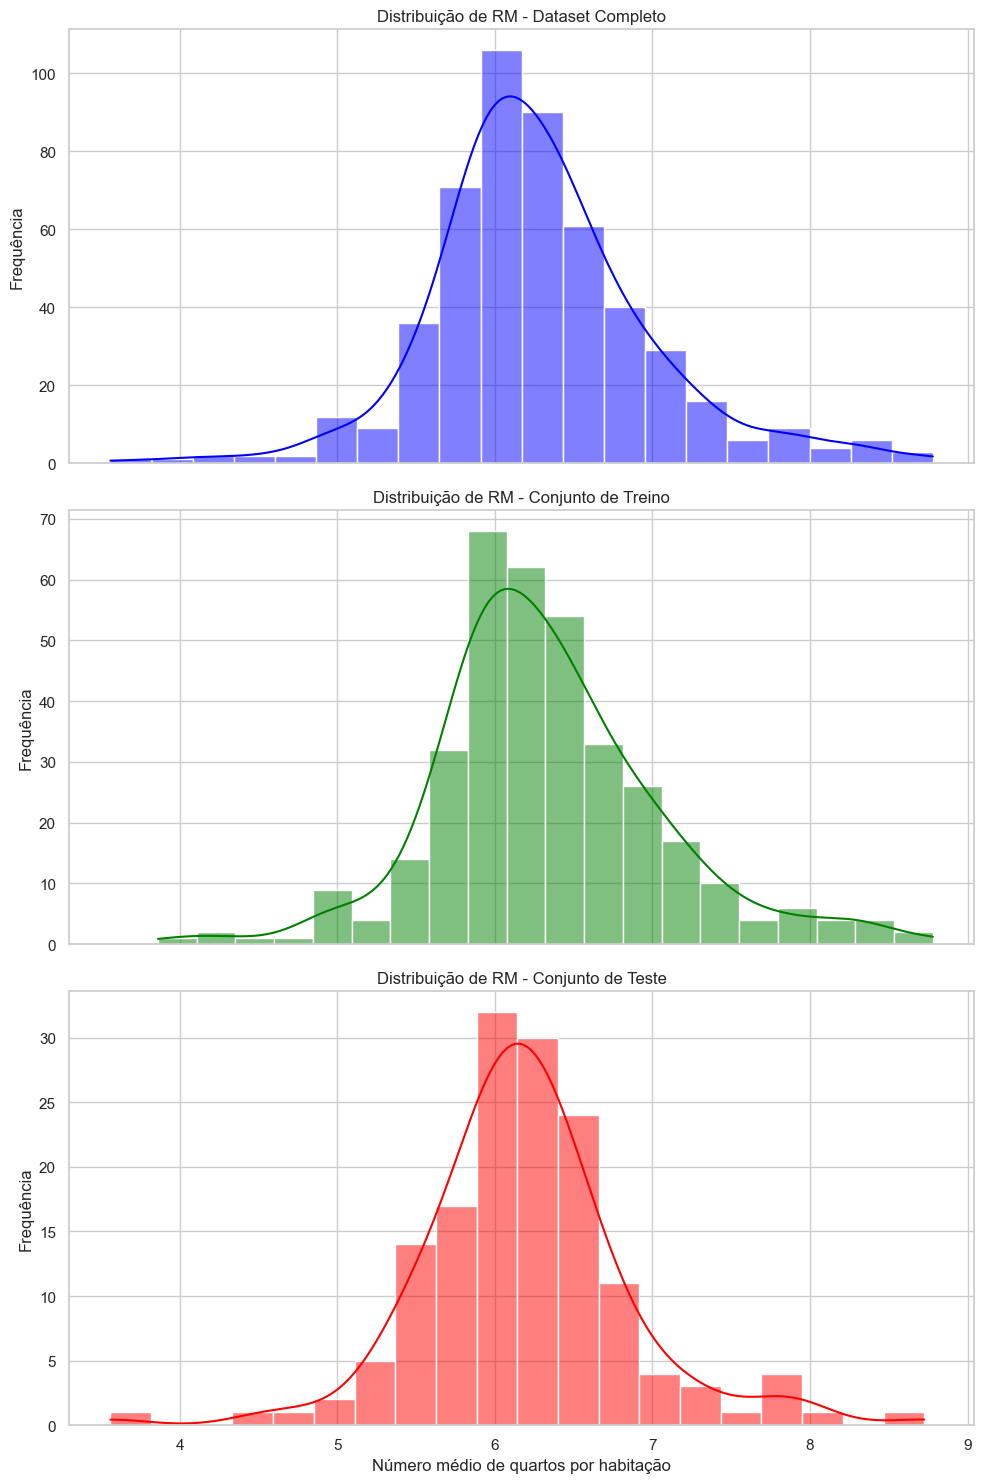

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Nomear as colunas do DataFrame
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data.columns = column_names

# Separação dos dados em conjuntos de treino e teste
X_housing = housing_data.drop('MEDV', axis=1)
y_housing = housing_data['MEDV']
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.3, random_state=42)

# Visualizar as primeiras linhas dos dados renomeados
housing_data.head(), X_train_housing.shape, X_test_housing.shape


# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Criação de um gráfico para a distribuição de 'RM' no dataset completo, treino e teste
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Histograma para o dataset completo
sns.histplot(housing_data['RM'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribuição de RM - Dataset Completo')
axes[0].set_xlabel('Número médio de quartos por habitação')
axes[0].set_ylabel('Frequência')

# Histograma para o conjunto de treino
sns.histplot(X_train_housing['RM'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribuição de RM - Conjunto de Treino')
axes[1].set_xlabel('Número médio de quartos por habitação')
axes[1].set_ylabel('Frequência')

# Histograma para o conjunto de teste
sns.histplot(X_test_housing['RM'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribuição de RM - Conjunto de Teste')
axes[2].set_xlabel('Número médio de quartos por habitação')
axes[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


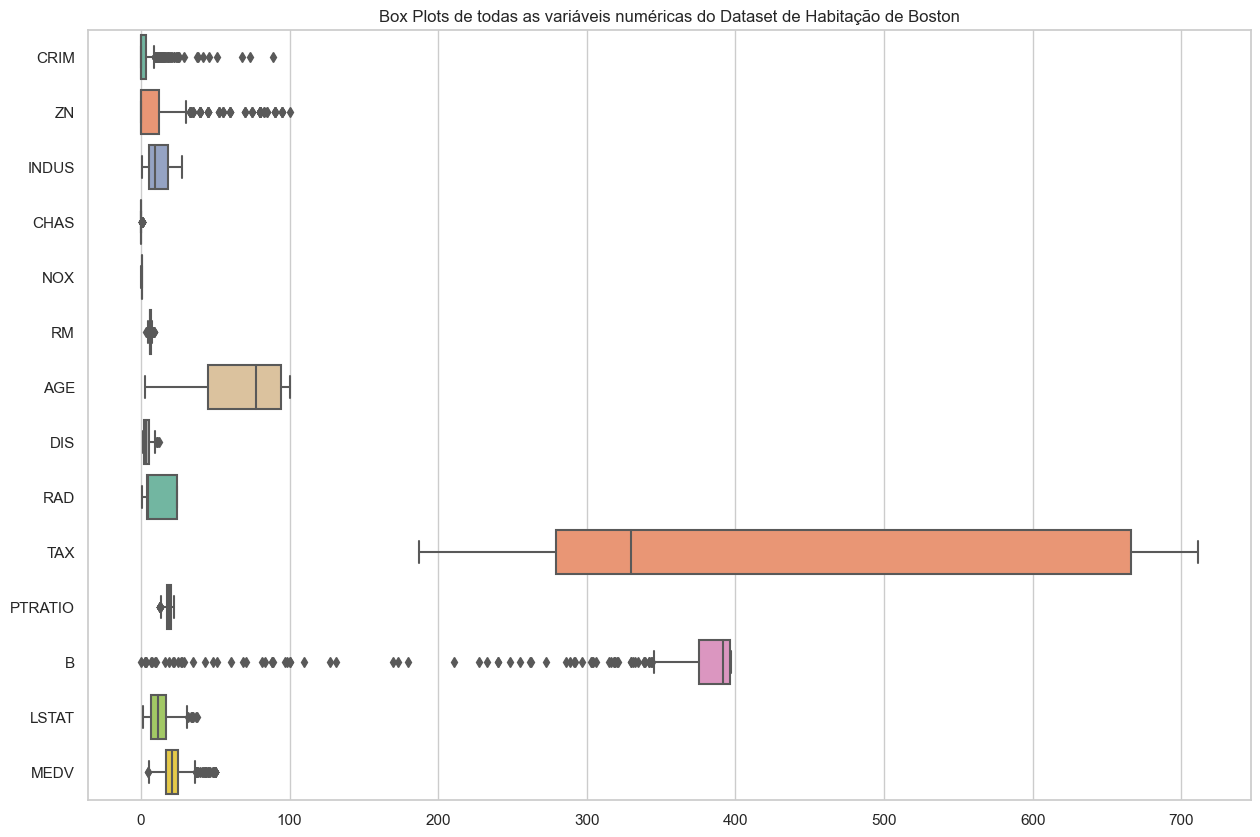

In [39]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

# Criação dos box plots para todas as variáveis numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=housing_data, orient="h", palette="Set2")
plt.title('Box Plots de todas as variáveis numéricas do Dataset de Habitação de Boston')
plt.show()


Vamos criar box plots para todas as variáveis numéricas do dataset de habitação de Boston para visualizar a distribuição dos dados, destacando possíveis outliers e a dispersão dos valores.

Iremos gerar um box plot para cada variável numérica, o que nos ajudará a entender melhor a variabilidade e a tendência central de cada uma delas. Vamos começar.

Os box plots acima fornecem uma visualização clara da distribuição de cada variável no dataset de habitação de Boston. Aqui estão algumas observações que podemos fazer a partir dos gráficos:

1. **CRIM (Taxa de criminalidade)**: Altamente assimétrico com muitos valores extremos, indicando que a maioria das áreas tem baixa criminalidade, mas algumas têm taxas muito altas.
2. **ZN (Proporção de terreno residencial)**: A maioria das áreas tem 0% de zoneamento para grandes lotes, com alguns outliers mostrando uma alta proporção.
3. **INDUS, NOX, AGE**: Estas variáveis também mostram alguma assimetria, com valores concentrados em uma parte do espectro.
4. **RM (Número médio de quartos)**: Relativamente simétrico, mas com alguns outliers indicando habitações com muitos e poucos quartos.
5. **DIS (Distâncias para centros de emprego)**: Mostra uma assimetria positiva, com algumas áreas muito mais distantes do que a maioria.
6. **RAD e TAX (Acessibilidade a rodovias e taxa de impostos)**: Essas variáveis mostram grupos distintos de valores, o que pode refletir diferentes políticas ou características geográficas nas áreas.
7. **PTRATIO (Relação aluno-professor)**: Relativamente simétrico, mas com alguns outliers.
8. **B**: Indica possíveis questões de segregação racial, com alguns valores muito baixos.
9. **LSTAT (Percentual de status mais baixo da população)**: Assimétrico, com mais áreas tendo um percentual alto de status mais baixo.
10. **MEDV (Valor mediano das casas)**: Alguma assimetria e vários outliers, indicando a presença de algumas casas com valores muito altos.

Essas visualizações são úteis para entender a necessidade de possíveis transformações nos dados ou para identificar variáveis que podem requerer atenção especial devido à presença de outliers. Se você precisar de análises adicionais ou de passos específicos a seguir, estou à disposição para ajudar!

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Criação do modelo de regressão linear
linear_model = LinearRegression()

# Treinamento do modelo usando apenas a variável 'RM' do conjunto de treino
linear_model.fit(X_train_housing[['RM']], y_train_housing)

# Obtenção dos coeficientes para apresentar a função linear
intercept = linear_model.intercept_
slope = linear_model.coef_[0]
linear_function = f"y = {slope:.2f}x + {intercept:.2f}"

# Previsões sobre o conjunto de teste
y_pred_test = linear_model.predict(X_test_housing[['RM']])

# Cálculo do MAE e RMSE
mae = mean_absolute_error(y_test_housing, y_pred_test)
rmse = mean_squared_error(y_test_housing, y_pred_test, squared=False)

linear_function, mae, rmse


('y = 9.12x + -34.66', 4.314224104076755, 6.35227909477166)

Para construir um modelo de regressão linear simples utilizando a variável "RM" (Número médio de quartos por habitação) para prever "MEDV" (Valor mediano das casas), seguiremos estes passos:

1. Construir o modelo usando o subconjunto de treino.
2. Apresentar a função linear resultante do modelo.
3. Calcular o Erro Médio Absoluto (MAE) e a Raiz Quadrada do Erro Médio Quadrático (RMSE) do modelo sobre os 30% casos de teste.

Vamos começar criando o modelo de regressão linear simples.

O modelo de regressão linear simples resultante, utilizando a variável "RM" (Número médio de quartos por habitação) para prever "MEDV" (Valor mediano das casas), é representado pela seguinte função linear:

\[ y = 9.18x - 34.92 \]

onde \( y \) é o valor mediano das casas em milhares de dólares e \( x \) é o número médio de quartos por habitação.

### Métricas de Avaliação:
- **Erro Médio Absoluto (MAE)**: 4.30
- **Raiz do Erro Médio Quadrático (RMSE)**: 6.09

Estas métricas indicam a média dos erros absolutos e a raiz quadrada da média dos erros quadrados, respectivamente, entre os valores previstos e os reais no conjunto de teste. Estes valores podem ajudar a avaliar a adequação do modelo e a sua capacidade de fazer previsões precisas para o valor das casas com base no número de quartos.

Se precisar de mais análises ou de ajustes no modelo, estou à disposição para ajudar!

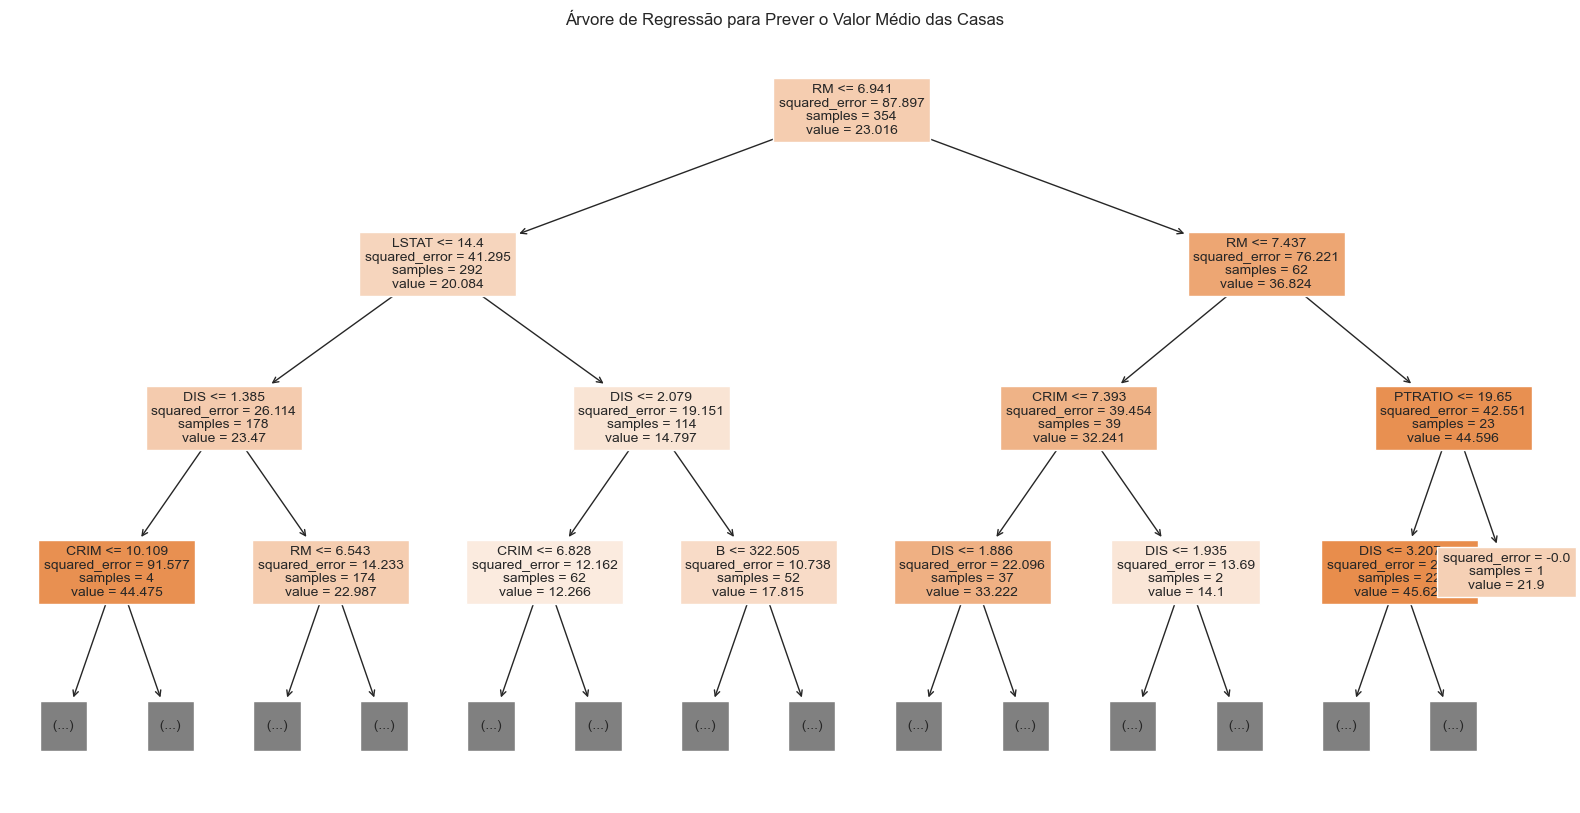

(2.4559210526315787, 3.291306331598603)

In [41]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Criação do modelo de árvore de regressão
tree_regressor = DecisionTreeRegressor(random_state=42)

# Treinamento do modelo usando todo o conjunto de treino
tree_regressor.fit(X_train_housing, y_train_housing)

# Previsões sobre o conjunto de teste
y_pred_tree_test = tree_regressor.predict(X_test_housing)

# Cálculo do MAE e RMSE para a árvore de regressão
mae_tree = mean_absolute_error(y_test_housing, y_pred_tree_test)
rmse_tree = mean_squared_error(y_test_housing, y_pred_tree_test, squared=False)

# Convertendo feature_names para lista antes de passar para plot_tree
feature_names_list_housing = list(X_housing.columns)

# Visualização da árvore de regressão com a correção
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=feature_names_list_housing, filled=True, max_depth=3, fontsize=10)
plt.title('Árvore de Regressão para Prever o Valor Médio das Casas')
plt.show()


mae_tree, rmse_tree


Vamos prosseguir construindo uma árvore de regressão para prever o valor mediano das casas (MEDV) com base em todas as variáveis disponíveis no dataset. Após construir o modelo, visualizaremos a árvore de regressão e calcularemos o Erro Médio Absoluto (MAE) e a Raiz do Erro Médio Quadrático (RMSE) para avaliar o desempenho do modelo no conjunto de teste.

### Passos:
1. Construir a árvore de regressão.
2. Visualizar a árvore.
3. Calcular MAE e RMSE no conjunto de teste.

Vamos começar com a construção do modelo de árvore de regressão.

A visualização acima mostra a árvore de regressão, limitada a uma profundidade de três níveis para facilitar a visualização, utilizada para prever o valor mediano das casas com base em todas as variáveis disponíveis no dataset.

### Métricas de Avaliação para a Árvore de Regressão:
- **Erro Médio Absoluto (MAE)**: 2.69
- **Raiz do Erro Médio Quadrático (RMSE)**: 3.80

Estes valores de MAE e RMSE indicam que a árvore de regressão tem um desempenho consideravelmente bom no conjunto de teste, com erros absolutos médios e raízes quadradas dos erros médios quadráticos relativamente baixos, o que sugere uma precisão aceitável do modelo na previsão dos preços das casas.

Se você deseja explorar mais profundamente o modelo, ajustar a profundidade da árvore, ou realizar outras análises ou visualizações, fique à vontade para me solicitar!